In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from pyntcloud import PyntCloud
import pymesh

In [2]:
positions = np.random.uniform(size=(100, 3)) - 0.5
points = pd.DataFrame(positions, columns=['x', 'y', 'z'])

colors = (np.random.uniform(size=(100, 3)) * 255).astype(np.uint8)
points[['red', 'blue', 'green']] = pd.DataFrame(colors, index=points.index)

In [3]:
lines = [
    [[0, 0, 0], [0, 0, 1]],
    [[1, 0, 0], [1, 0, 1], [1, 1, 1]],
]

In [4]:
cloud = PyntCloud(points)
cloud.plot(point_size=0.05, opacity=0.6, 
           lines=lines, line_color=[0xFFFFFF, 0xFF00FF])

In [25]:
points = np.random.rand(1000, 3)
points = pd.DataFrame(points, columns=['x', 'y', 'z'])
cloud = PyntCloud(points)
cloud.plot(line_color='')

In [12]:
cloud.points.describe()

,x,y,z
count,1000.000000,1000.000000,1000.000000
mean,0.486596,0.509432,0.492145
std,0.289434,0.290013,0.287411
min,0.001833,0.000522,0.000156
25%,0.235694,0.267921,0.240603
50%,0.489338,0.516950,0.506335
75%,0.741733,0.761070,0.730057
max,0.999961,0.998850,0.999680


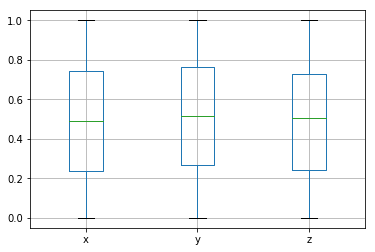

In [13]:
cloud.points.boxplot()

In [14]:
scene = PyntCloud.from_file('visible.ply')

In [15]:
scene

PyntCloud
51777 points with 7 scalar fields
99059 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -17.429340362548828, 7.901965618133545, 5.268535137176514
Other attributes:

In [16]:
scene.mesh.head()

,v1,v2,v3
0,0,2,1
1,0,3,2
2,37,83,36
3,37,38,84
4,39,84,38


In [19]:
sampled_points = scene.get_sample('mesh_random_sampling', n=500000, rgb=True, normals=True)
scene = PyntCloud(sampled_points)

In [20]:
scene

PyntCloud
500000 points with 6 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -10.083793640136719, 0.9527376294136047, 0.39196690917015076
Other attributes:

In [21]:
scene.points.head()

,x,y,z,red,green,blue,nx,ny,nz
0,-7.815987,1.294691,0.0,0,28,0,0.0,0.0,1.0
1,-11.307006,-49.285583,0.0,0,85,0,0.0,0.0,1.0
2,-24.167963,13.800852,0.0,0,85,0,0.0,0.0,1.0
3,-13.036241,12.990661,0.0,0,85,0,0.0,0.0,1.0
4,-15.107207,28.200556,0.0,0,85,0,0.0,0.0,1.0


In [23]:
scene.plot(line_color='')

In [26]:
is_floor = scene.add_scalar_field('plane_fit', n_inliers_to_stop=len(scene.points)/30)

In [27]:
scene.points.head()

,x,y,z,red,green,blue,nx,ny,nz,is_plane
0,-7.815987,1.294691,0.0,0,28,0,0.0,0.0,1.0,1
1,-11.307006,-49.285583,0.0,0,85,0,0.0,0.0,1.0,1
2,-24.167963,13.800852,0.0,0,85,0,0.0,0.0,1.0,1
3,-13.036241,12.990661,0.0,0,85,0,0.0,0.0,1.0,1
4,-15.107207,28.200556,0.0,0,85,0,0.0,0.0,1.0,1


In [28]:
help(PyntCloud.plot)

Help on function plot in module pyntcloud.core_class:

plot(self, mesh=False, point_size=0.3, opacity=0.9, use_as_color=['red', 'green', 'blue'], cmap='hsv', output_name='pyntcloud_plot', width=800, height=500, lines=[], line_color='0xFF0000')
    Visualize PyntCloud in a Jupyter notebook using three.js.
    
    Parameters
    ----------
    point_size: float, optional
        Default: 0.3
        Size of the plotted points.
    
    opacity: float, optional
        Default: 0.9
        Opacity of the plotted points.
    
    use_as_color: str or ["red", "green", "blue"], optional
        Default: ["red", "green", "blue"]
        Indicates wich scalar fields will be used to colorize the rendered
        point cloud.
    
    cmap: str, optional
        Default: "hsv"
        Color map that will be used to convert a single scalar field into rgb.
        Check matplotlib cmaps.
    
    output_name: str, optional
        Default: "pyntcloud_plot"
        Base filename that will be used 